In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Analysis/lab5/Obesity.csv')
dataset.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0.0,1.62,64.0,3.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,3.0,1.0
1,21.0,0.0,1.52,56.0,2.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,1.0
2,23.0,1.0,1.80,77.0,1.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,3.0,1.0
3,27.0,1.0,1.80,87.0,1.0,0.0,3.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,4.0,2.0
4,22.0,1.0,1.78,89.8,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,2.0


In [ ]:
vals = dataset["NObeyesdad"].unique()
vals

array([1., 2., 0.])

In [ ]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters = [
    'Age',
    'Gender',
    'Height',
    'Weight',
    'CALC',
    'FAVC',
    'FCVC',
    'NCP',
    'SCC',
    'SMOKE',
    'CH2O',
    'family_history_with_overweight',
    'FAF',
    'TUE',
    'CAEC',
    'MTRANS'
    ]

df= dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [ ]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,21.0,0.0,1.62,64.0,3.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,3.0
1,21.0,0.0,1.52,56.0,2.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0
2,23.0,1.0,1.80,77.0,1.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,3.0
3,27.0,1.0,1.80,87.0,1.0,0.0,3.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,4.0
4,22.0,1.0,1.78,89.8,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0


In [ ]:
X = df
y = dataset["NObeyesdad"].replace(vals, [0, 1, 2])
yvals = dataset["NObeyesdad"]

### Распространенные алгоритмы кластеризации



In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

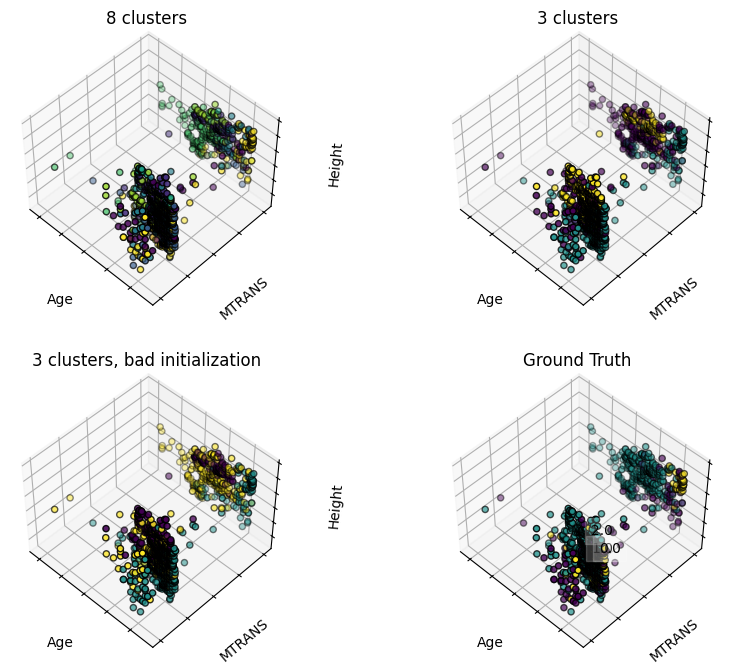

In [ ]:
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Age"], X["MTRANS"], X["Height"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Age")
    ax.set_ylabel("MTRANS")
    ax.set_zlabel("Height")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2)]:
    ds = dataset[dataset["NObeyesdad"]==name]
    ax.text3D(
        ds["Age"].mean(),
        ds["MTRANS"].mean(),
        ds["Height"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["Age"], X["MTRANS"], X["Height"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Age")
ax.set_ylabel("MTRANS")
ax.set_zlabel("Height")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [ ]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n




In [ ]:
best_metric

[3,
 0.5005126385469671,
 0.24142770985833775,
 array([[2.62343301e+01, 6.06141522e-01, 1.70713170e+00, 8.37929037e+01,
         2.32977303e+00, 8.86515354e-01, 2.26402924e+00, 2.53612121e+00,
         2.53671562e-02, 1.86915888e-02, 2.00012996e+00, 9.17222964e-01,
         1.07755958e+00, 6.39076338e-01, 1.88651535e+00, 2.02536716e+00],
        [2.09217467e+01, 3.52671756e-01, 1.65105148e+00, 5.67889640e+01,
         2.37251908e+00, 7.70992366e-01, 2.35712253e+00, 2.68455460e+00,
         1.14503817e-01, 1.98473282e-02, 1.89878779e+00, 5.09923664e-01,
         1.10679930e+00, 7.53671792e-01, 1.69007634e+00, 2.60152672e+00],
        [2.54181627e+01, 5.41725601e-01, 1.74280132e+00, 1.17150654e+02,
         2.10749646e+00, 9.85855728e-01, 2.64063189e+00, 2.84501098e+00,
         2.82885431e-03, 2.40452617e-02, 2.11755124e+00, 9.97171146e-01,
         8.49636170e-01, 5.89012396e-01, 1.98727016e+00, 2.50636492e+00]])]

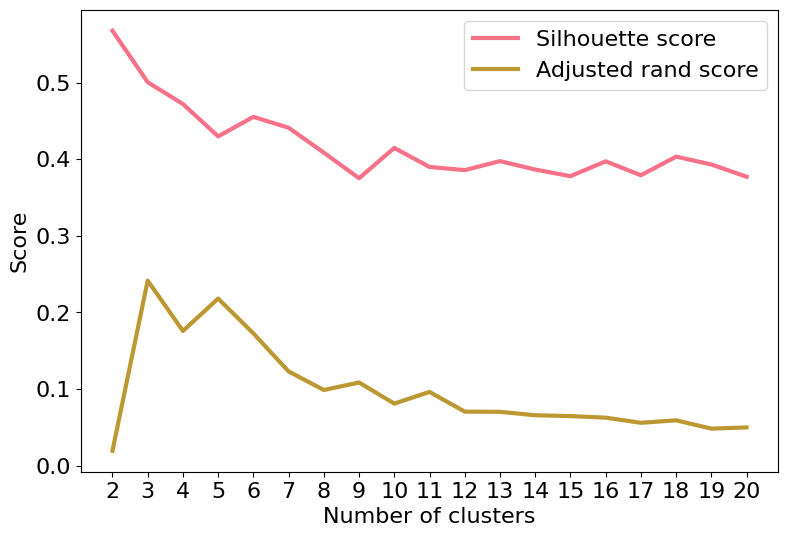

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()


#plt.figure(figsize=(9, 6))
#plt.plot(n_clusters, within_cluster_dist_values, linewidth=3, label='Within-cluster distance')
#plt.xlabel('Number of clusters', size=16)
#plt.ylabel('Score', size=16)
#plt.xticks(n_clusters, size=16)
#plt.yticks(size=16)
#plt.legend(loc='best', fontsize=16)

#plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

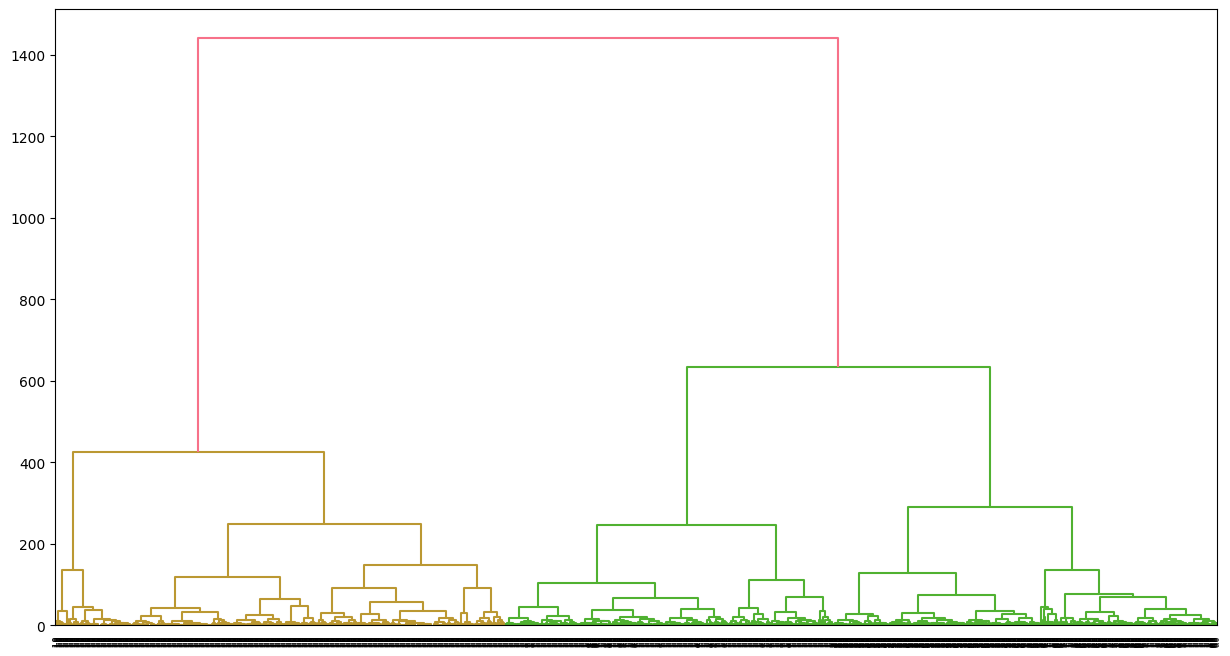

In [ ]:
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
mins = X.shape[1]

['y', 'b', 'g', 'r']


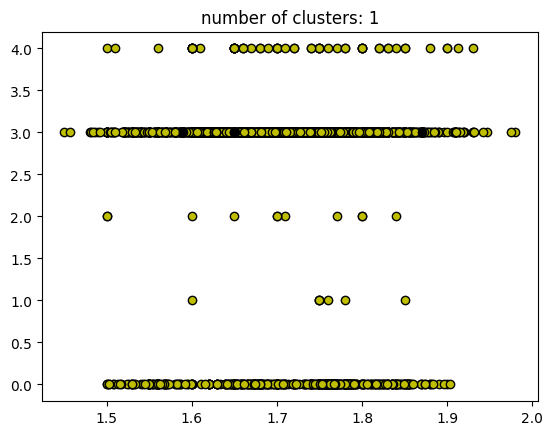

In [ ]:
db = DBSCAN(eps=9, min_samples=9).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["Height"], xy["MTRANS"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["Height"], xy["MTRANS"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


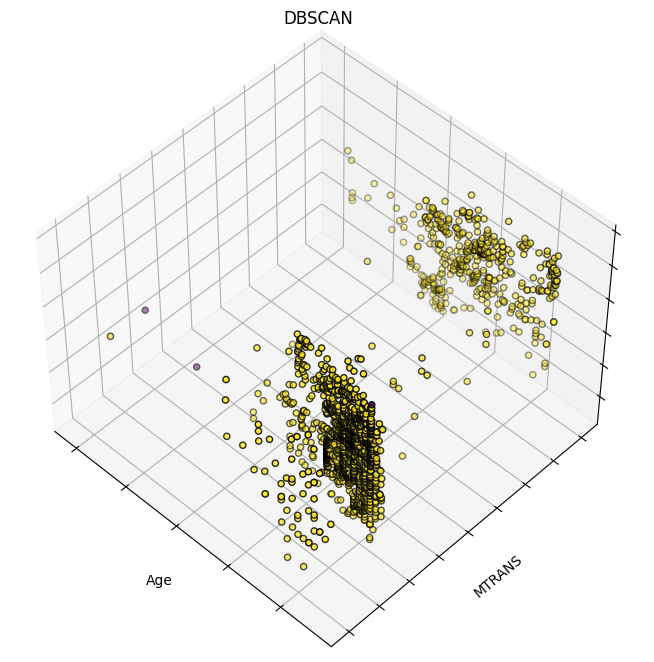

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["Age"], X["MTRANS"], X["Height"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Age")
ax.set_ylabel("MTRANS")
ax.set_zlabel("Height")
ax.set_title("DBSCAN")

plt.show()

In [ ]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.48
Adjusted Rand Index: 0.00
